<a href="https://colab.research.google.com/github/a151815058/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format',lambda x:'%.2f'% x)

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
sales_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/佐登妮絲/青年計劃/data3_project.csv')

In [3]:
sales_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04


In [8]:
sales_data.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date
1404430,PS5324024941,KQ02,玫瑰晶萃活膚液130ml,16.00,2020-12-31,2946.00,9100000595826.00,中區,2010-03-15,2012-07-11
1404431,PS5219002027,GAXFG1,真正除臭抗菌噴霧(銀離子迷迭香)250ml,8.00,2020-12-31,309.00,9100003028369.00,竹區,2020-12-08,2020-11-26
1404432,PS5219002027,MAB2G1,BA-5肌密全效噴霧奇蹟水70ml,8.00,2020-12-31,1094.00,9100003028369.00,竹區,2020-12-08,2020-11-26
1404433,PS5219002027,WD096,緊緻保濕裸膚羽翼面膜25ml-零售單包,16.00,2020-12-31,165.00,9100003028369.00,竹區,2020-12-08,2020-11-26
1404434,PS5219002028,GAXFG2,真正除臭抗菌噴霧(銀離子迷迭香)350ml,8.00,2020-12-31,441.00,9100003039464.00,竹區,2020-12-23,2020-12-10


### Data Wrangling

In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404435 entries, 0 to 1404434
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   InvoiceNo          1404435 non-null  object 
 1   StockCode          1404435 non-null  object 
 2   Description        1404435 non-null  object 
 3   Quantity           1404435 non-null  float64
 4   InvoiceDate        1404435 non-null  object 
 5   UnitPrice          1404435 non-null  float64
 6   CustomerID         1403724 non-null  float64
 7   Country            1404435 non-null  object 
 8   member_start_date  1366651 non-null  object 
 9   first_trans_date   1400412 non-null  object 
dtypes: float64(3), object(7)
memory usage: 107.2+ MB


In [10]:
sales_data.shape

(1404435, 10)

In [11]:
sales_data.Description.value_counts()

全背順氣活力SPA課程單堂          58636
清除環境中腸病毒濕紙巾10抽         52599
plus5智頻美塑儀課程單堂         46660
(新)溫熱刮痧課程單堂            34129
全身健康優化SPA課程單堂          33770
                       ...  
2017MOMO購物網背部舒壓樂活課程        1
煥顏苦杏仁酸乳霜- 職業包              1
全身病理舒穴油壓單堂                 1
深海藍鑽均衡水                    1
如膠似漆ISLN62                 1
Name: Description, Length: 870, dtype: int64

In [12]:
sales_data.isna().any()

InvoiceNo            False
StockCode            False
Description          False
Quantity             False
InvoiceDate          False
UnitPrice            False
CustomerID            True
Country              False
member_start_date     True
first_trans_date      True
dtype: bool

In [13]:
sales_data.drop(sales_data[sales_data['CustomerID'].isnull()].index,inplace=True)

In [14]:
sales_data.shape

(1403724, 10)

In [15]:
sales_data['Revenue'] = sales_data['Quantity'] * sales_data['UnitPrice']

In [16]:
sales_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,12008.00
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00


In [17]:
sales_data.Revenue.describe()

count     1403724.00
mean        83205.24
std        922392.26
min        -19824.00
25%          4720.00
50%          8792.00
75%         26240.00
max     702441768.00
Name: Revenue, dtype: float64

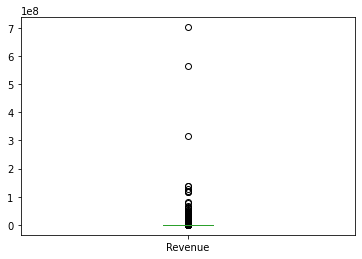

In [18]:
sales_data['Revenue'].plot.box()

In [19]:
sales_data1=sales_data.copy()

#### Z-score()

Outliers = Observations with z-scores > 3 or < -3



In [20]:
sales_data['Revenue_zcore']=(sales_data['Revenue']-sales_data['Revenue'].mean())/sales_data['Revenue'].std(ddof=0)
sales_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,Revenue_zcore
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,-0.08
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,-0.08
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,-0.08
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,12008.00,-0.08
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,-0.08


In [21]:
sales_data['Outlier'] = abs(sales_data['Revenue_zcore']>3).astype(int)
sales_data.loc[sales_data['Outlier'] >0,['Revenue','Revenue_zcore']]
#sales_data[sales_data['Outlier'] >0 ].shape
#sales_data = sales_data[sales_data['Outlier'] == 0]
#sales_data.shape

,Revenue,Revenue_zcore
1699,4844064.00,5.16
4458,4023600.00,4.27
4668,5788320.00,6.19
5070,11329248.00,12.19
6362,4023600.00,4.27
...,...,...
1402112,6006792.00,6.42
1402113,4755136.00,5.07
1402115,5851016.00,6.25
1402120,17226552.00,18.59


In [22]:
sales_data.loc[sales_data['Outlier'] ==0,['Revenue','Revenue_zcore']]

,Revenue,Revenue_zcore
0,10072.00,-0.08
1,6712.00,-0.08
2,6712.00,-0.08
3,12008.00,-0.08
4,5376.00,-0.08
...,...,...
1404430,47136.00,-0.04
1404431,2472.00,-0.09
1404432,8752.00,-0.08
1404433,2640.00,-0.09


In [23]:
sales_data = sales_data[sales_data['Outlier'] == 0]
sales_data.shape

(1403033, 13)

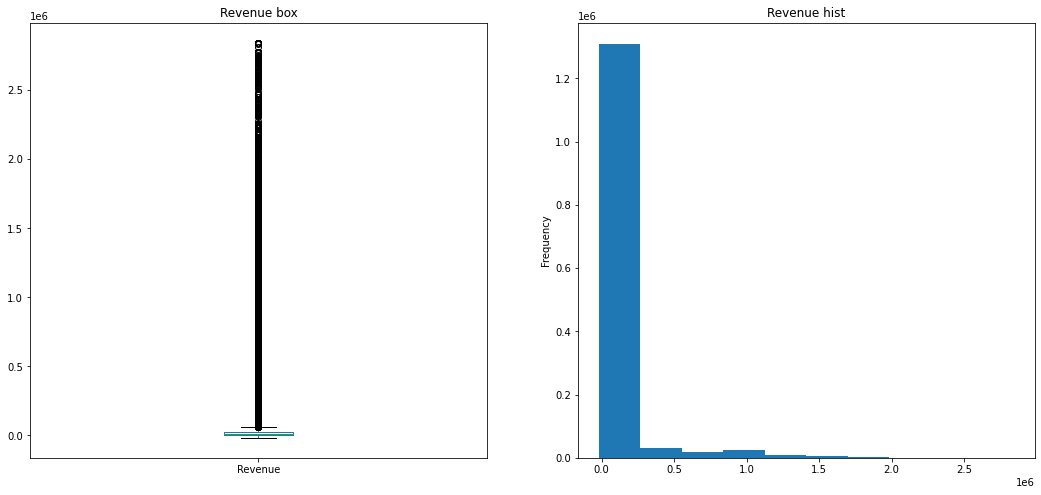

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1, 2,figsize=(18,8))
sales_data['Revenue'].plot.box(ax=axis[0])
axis[0].set_title('Revenue box')
sales_data['Revenue'].plot.hist(ax=axis[1])
axis[1].set_title('Revenue hist')
plt.show()

In [25]:
sales_data['Revenue'].describe()

count   1403033.00
mean      77560.11
std      237075.10
min      -19824.00
25%        4720.00
50%        8792.00
75%       26072.00
max     2844192.00
Name: Revenue, dtype: float64

#### IQR
IQR = Q3 - Q1

Outliers = Observations > Q3 + 1.5*IQR  or  Q1 – 1.5*IQR



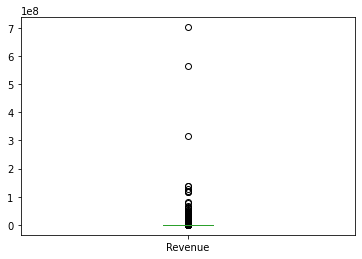

In [26]:
sales_data1['Revenue'].plot.box()

In [27]:
def Outlier_treatment(datacolumn):
  Q1,Q3 = np.percentile(datacolumn,[25,75])
  IQR = Q3-Q1
  lower_range = Q1 - (1.5 * IQR)
  high_range = Q3 + (1.5 * IQR)
  return lower_range,high_range

In [28]:
lowerbound,highbound = Outlier_treatment(sales_data1['Revenue'])

sales_data1[(sales_data1['Revenue'] < lowerbound) | (sales_data1['Revenue']>highbound)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
9,PS5262016031,HA89A01,肌因彈潤課程單堂,48.00,2019-01-01,9559.00,9100000407160.00,竹區,2007-01-02,2012-07-28,458832.00
10,PS5262016032,HB90A01,全背順氣活力SPA課程單堂,96.00,2019-01-01,11559.00,9100000407160.00,竹區,2007-01-02,2012-07-28,1109664.00
13,PS530A050714,FB40A01,旗艦暖宮腹活SPA課程單堂,96.00,2019-01-01,13259.00,9100002554883.00,中區,2018-10-18,2018-10-18,1272864.00
31,PS5213017253,HA50A01,胜肽美顏SPA護理單堂,48.00,2019-01-01,6059.00,9100001531076.00,台北B區,2013-11-23,2013-04-09,290832.00
35,PS5264013310,HA86A01,太極磁氧靚顏課程單堂,96.00,2019-01-01,8559.00,9100000161946.00,竹區,2004-09-09,2012-07-10,821664.00
...,...,...,...,...,...,...,...,...,...,...,...
1404400,PS5324024939,JAA3G2,玻尿酸超保濕精華96%原液60ml,16.00,2020-12-31,4239.00,9100000043037.00,中區,2004-11-11,2012-07-23,67824.00
1404401,PS5324024939,KQ02,玫瑰晶萃活膚液130ml,24.00,2020-12-31,5395.00,9100000043037.00,中區,2004-11-11,2012-07-23,129480.00
1404418,PS5324024940,KQ06,玫瑰晶萃瞬效霜30ml,16.00,2020-12-31,4083.00,9100000706055.00,中區,2011-12-21,2014-03-10,65328.00
1404421,PS5324024940,MAA7G1,白金密集煥白面膜18ml*6pcs,32.00,2020-12-31,6923.00,9100000706055.00,中區,2011-12-21,2014-03-10,221536.00


In [29]:
sales_data1.drop(sales_data1[(sales_data1['Revenue'] < lowerbound) | (sales_data1['Revenue']>highbound)].index,inplace=True)

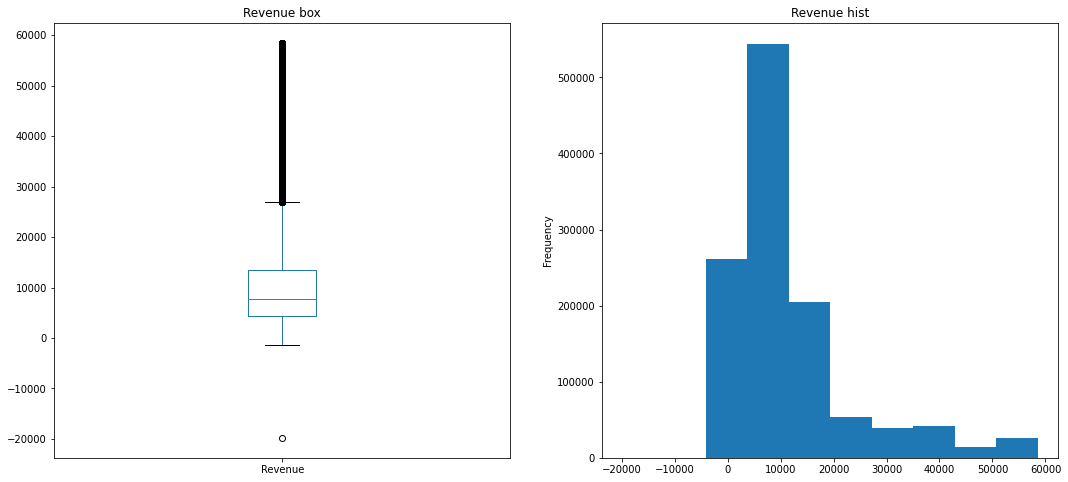

In [30]:
figure, axis = plt.subplots(1, 2,figsize=(18,8))
sales_data1['Revenue'].plot.box(ax=axis[0])
axis[0].set_title('Revenue box')
sales_data1['Revenue'].plot.hist(ax=axis[1])
axis[1].set_title('Revenue hist')
plt.show()

In [31]:
sales_data1.shape

(1185297, 11)

### EDA

#### Monthly Revenue

In [32]:
sales_data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,12008.00
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00


In [33]:
sales_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185297 entries, 0 to 1404434
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   InvoiceNo          1185297 non-null  object 
 1   StockCode          1185297 non-null  object 
 2   Description        1185297 non-null  object 
 3   Quantity           1185297 non-null  float64
 4   InvoiceDate        1185297 non-null  object 
 5   UnitPrice          1185297 non-null  float64
 6   CustomerID         1185297 non-null  float64
 7   Country            1185297 non-null  object 
 8   member_start_date  1148618 non-null  object 
 9   first_trans_date   1182061 non-null  object 
 10  Revenue            1185297 non-null  float64
dtypes: float64(4), object(7)
memory usage: 108.5+ MB


In [34]:
sales_data1['InvoiceDate'] = pd.to_datetime(sales_data1['InvoiceDate'])
sales_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185297 entries, 0 to 1404434
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   InvoiceNo          1185297 non-null  object        
 1   StockCode          1185297 non-null  object        
 2   Description        1185297 non-null  object        
 3   Quantity           1185297 non-null  float64       
 4   InvoiceDate        1185297 non-null  datetime64[ns]
 5   UnitPrice          1185297 non-null  float64       
 6   CustomerID         1185297 non-null  float64       
 7   Country            1185297 non-null  object        
 8   member_start_date  1148618 non-null  object        
 9   first_trans_date   1182061 non-null  object        
 10  Revenue            1185297 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 108.5+ MB


In [35]:
sales_data1['YearMonth'] = sales_data1['InvoiceDate'].map(lambda date:100 * date.year+date.month)
sales_data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,201901
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,12008.00,201901
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,201901


In [36]:
tx_revenue = sales_data1.groupby(['YearMonth'])['Revenue'].sum().reset_index()
tx_revenue

,YearMonth,Revenue
0,201901,435979408.00
1,201902,305933608.00
2,201903,710086584.00
3,201904,526652512.00
4,201905,560620600.00
5,201906,462028384.00
6,201907,488186448.00
7,201908,509359320.00
8,201909,562997160.00
9,201910,655246984.00


In [37]:
tx_revenue['YearMonth'] = tx_revenue['YearMonth'].astype(str)
tx_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  24 non-null     object 
 1   Revenue    24 non-null     float64
dtypes: float64(1), object(1)
memory usage: 512.0+ bytes


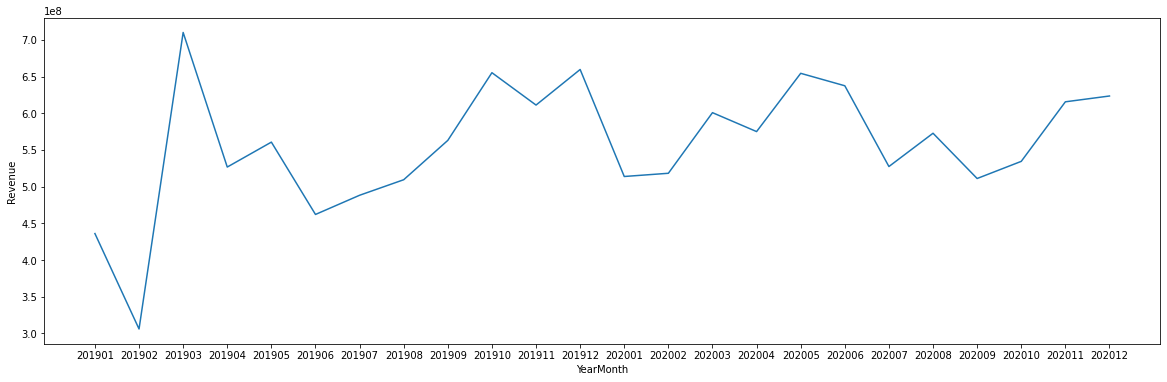

In [39]:
figure,axes = plt.subplots(figsize=(20,6))
sns.lineplot(ax = axes,x='YearMonth',y='Revenue',data=tx_revenue)
plt.show()

#### Monthly growth rate

In [40]:
tx_revenue['GrowthRate'] = tx_revenue['Revenue'].pct_change()
tx_revenue

,YearMonth,Revenue,GrowthRate
0,201901,435979408.00,nan
1,201902,305933608.00,-0.30
2,201903,710086584.00,1.32
3,201904,526652512.00,-0.26
4,201905,560620600.00,0.06
5,201906,462028384.00,-0.18
6,201907,488186448.00,0.06
7,201908,509359320.00,0.04
8,201909,562997160.00,0.11
9,201910,655246984.00,0.16


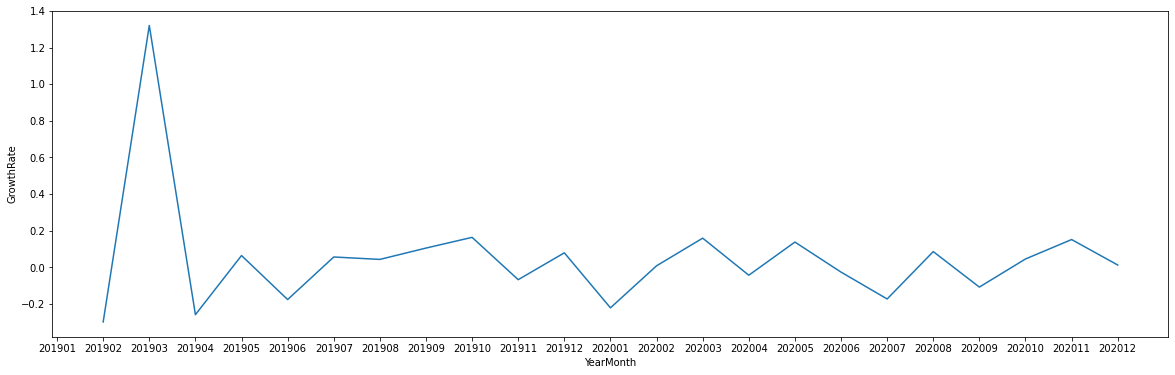

In [41]:
figure,axes = plt.subplots(figsize=(20,6))
sns.lineplot(ax = axes,x='YearMonth',y='GrowthRate',data=tx_revenue)
plt.show()

#### Monthly Order Count​

In [42]:
sales_data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,201901
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,12008.00,201901
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,201901


In [43]:
tx_sales_qty = sales_data1.groupby(['YearMonth'])['Quantity'].sum().reset_index()
tx_sales_qty

,YearMonth,Quantity
0,201901,372616.00
1,201902,244032.00
2,201903,760448.00
3,201904,515216.00
4,201905,489744.00
5,201906,406856.00
6,201907,407912.00
7,201908,449512.00
8,201909,454136.00
9,201910,650560.00


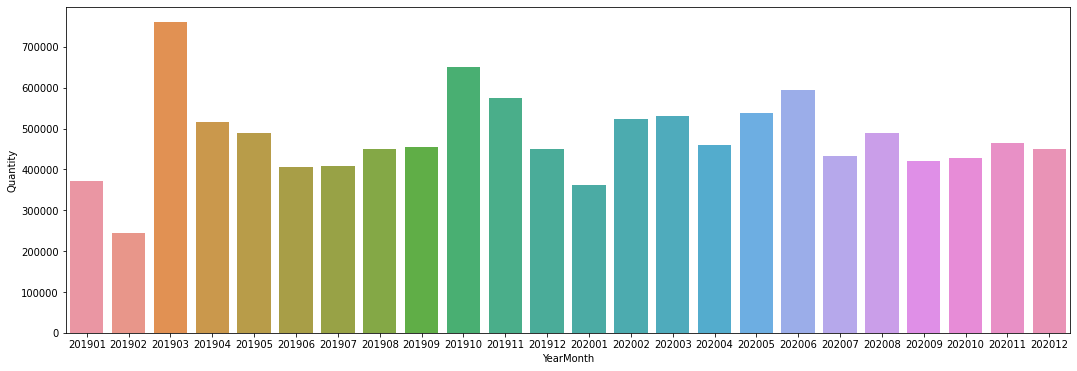

In [44]:
figure,axes = plt.subplots(figsize=(18,6))
sns.barplot(x='YearMonth',y='Quantity',data=tx_sales_qty,ax=axes)
plt.show()

#### Average Revenue per Order​

In [45]:
sales_data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,201901
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,12008.00,201901
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,201901


In [46]:
tx_revenue_avg = sales_data1.groupby(['YearMonth'])['Revenue'].mean().reset_index()
tx_revenue_avg

,YearMonth,Revenue
0,201901,10074.63
1,201902,11064.91
2,201903,9281.57
3,201904,10271.94
4,201905,10725.07
5,201906,11016.15
6,201907,11513.83
7,201908,10591.79
8,201909,11496.31
9,201910,13420.04


In [49]:
tx_revenue_avg['YearMonth'] = tx_revenue_avg['YearMonth'].astype(str)

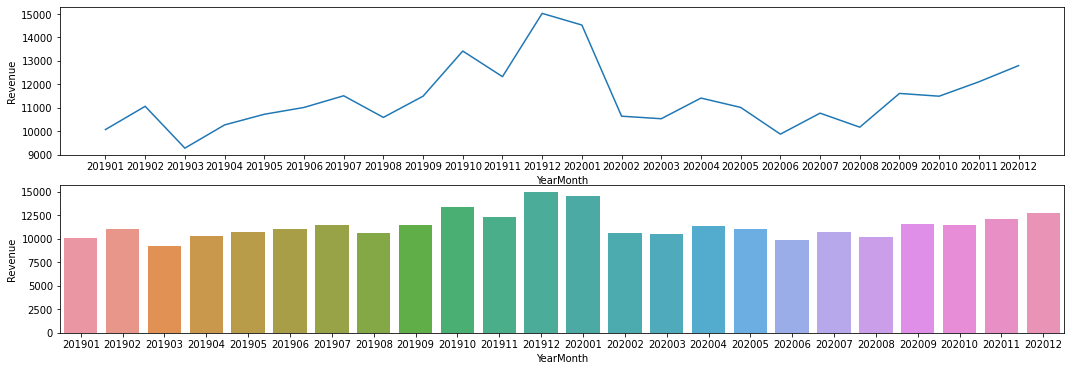

In [52]:
figure,axes = plt.subplots(2,1,figsize=(18,6))
sns.lineplot(x='YearMonth',y='Revenue',data=tx_revenue_avg,ax=axes[0])
sns.barplot(x='YearMonth',y='Revenue',data=tx_revenue_avg,ax=axes[1])
plt.show()

#### Monthly Active Customers​

In [55]:
tx_monthly_actives = sales_data1.groupby(['YearMonth'])['CustomerID'].nunique().reset_index()
tx_monthly_actives

,YearMonth,CustomerID
0,201901,11063
1,201902,8596
2,201903,15973
3,201904,11848
4,201905,12569
5,201906,11162
6,201907,10983
7,201908,12747
8,201909,12501
9,201910,14515


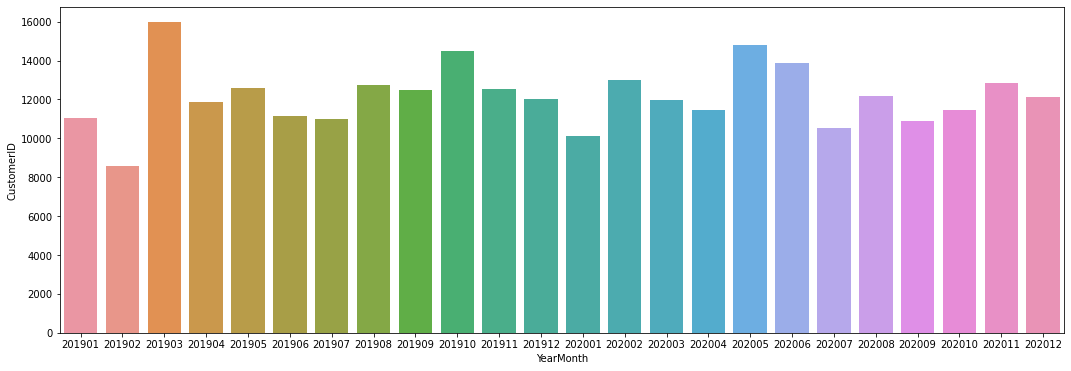

In [60]:
figure,axes1 = plt.subplots(figsize=(18,6))
sns.barplot(x='YearMonth',y='CustomerID',data=tx_monthly_actives,ax=axes1)
plt.show()

In [64]:
tx_monthly_actives['YearMonth'] = tx_monthly_actives['YearMonth'].astype(str)
tx_monthly_actives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YearMonth   24 non-null     object
 1   CustomerID  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


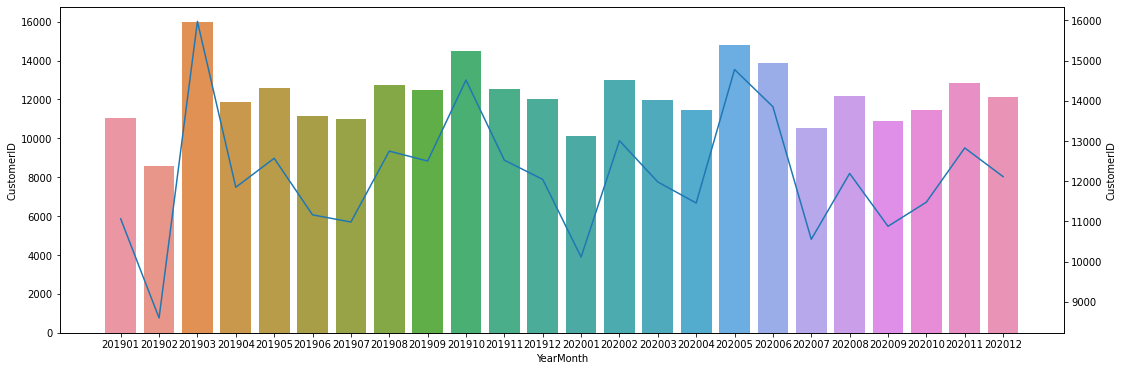

In [65]:
figure,axes1 = plt.subplots(figsize=(18,6))
sns.barplot(x='YearMonth',y='CustomerID',data=tx_monthly_actives,ax=axes1)
axes2 = axes1.twinx()
sns.lineplot(x='YearMonth',y='CustomerID',data=tx_monthly_actives,ax=axes2)
plt.show()

#### Revenue per month for New and Existing Customers

In [66]:
sales_data1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,201901
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,12008.00,201901
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,201901


In [70]:
sales_data1['customer_type'] = 'New'
#sales_data1.head()
sales_data1['member_start_date'] = pd.to_datetime(sales_data1['member_start_date'] )
sales_data1.loc[sales_data1['InvoiceDate'] > sales_data1['member_start_date'],'customer_type']='Existing'
sales_data1.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,member_start_date,first_trans_date,Revenue,YearMonth,customer_type
0,PS5327001158,JA01,晶淬雪潔顏乳100ml,8.00,2019-01-01,1259.00,9100002488768.00,中區,2019-12-09,2018-06-24,10072.00,201901,New
1,PS5335020955,KG06,多肽亮眼乳霜20g-保濕型,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901,Existing
2,PS5335020955,BJ102,檸檬精油10ml MUI,8.00,2019-01-01,839.00,9100002556566.00,中區,2018-10-21,2018-10-21,6712.00,201901,Existing
3,PS5335020955,JZA3G1,柚見快樂精油15ml MUI,-8.00,2019-01-01,-1501.00,9100002556566.00,中區,2018-10-21,2018-10-21,12008.00,201901,Existing
4,PS5444006919,BJ103,細花冬青香氛油10ml MUI,8.00,2019-01-01,672.00,9100002582077.00,南區,2018-12-04,2018-12-04,5376.00,201901,Existing
5,PS5444006920,K8018,植粹養護潤髮乳475ml,8.00,2019-01-01,549.00,9100002426142.00,南區,2017-12-19,2017-12-19,4392.00,201901,Existing
6,PS5444006920,K8018,植粹養護潤髮乳475ml,8.00,2019-01-01,549.00,9100002426142.00,南區,2017-12-19,2017-12-19,4392.00,201901,Existing
7,PS5171012881,KZ01,冰河淨化潔顏慕絲150ml,8.00,2019-01-01,995.00,9100000301403.00,台北A區,2005-03-02,2013-08-10,7960.00,201901,Existing
8,PS5262016031,J0033,緊緻俏麗霜150ml,8.00,2019-01-01,59.00,9100000407160.00,竹區,2007-01-02,2012-07-28,472.00,201901,Existing
11,PS5262016032,J0033,緊緻俏麗霜150ml,8.00,2019-01-01,59.00,9100000407160.00,竹區,2007-01-02,2012-07-28,472.00,201901,Existing


In [72]:
tx_customer_type_revenue = sales_data1.groupby(['YearMonth','customer_type'])['Revenue'].sum().reset_index()
tx_customer_type_revenue

,YearMonth,customer_type,Revenue
0,201901,Existing,414114832.00
1,201901,New,21864576.00
2,201902,Existing,284324480.00
3,201902,New,21609128.00
4,201903,Existing,685812128.00
5,201903,New,24274456.00
6,201904,Existing,506707256.00
7,201904,New,19945256.00
8,201905,Existing,536297424.00
9,201905,New,24323176.00


In [73]:
tx_customer_type_revenue['YearMonth']=tx_customer_type_revenue['YearMonth'].astype(str)

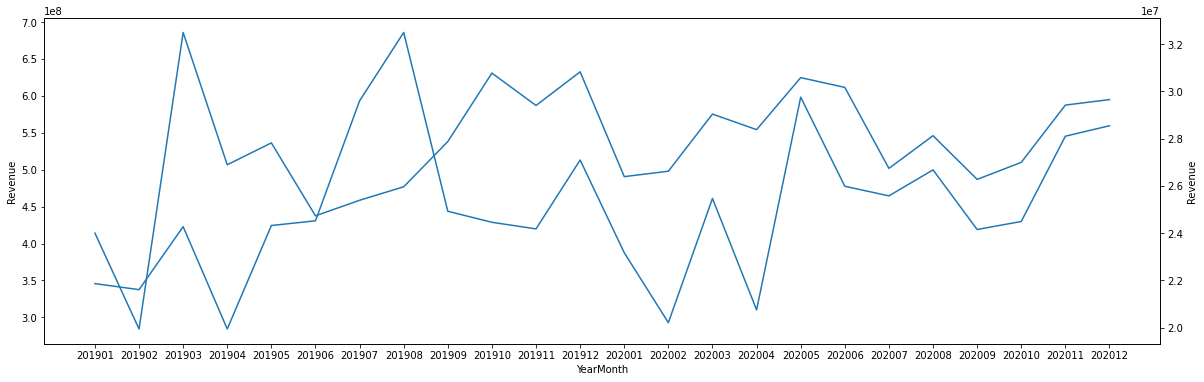

In [79]:
figure,axes = plt.subplots(figsize=(20,6))
sns.lineplot(x='YearMonth',y='Revenue',data=tx_customer_type_revenue.loc[tx_customer_type_revenue['customer_type'] == 'Existing'],ax=axes)
axes2 = axes.twinx()
sns.lineplot(x='YearMonth',y='Revenue',data=tx_customer_type_revenue.loc[tx_customer_type_revenue['customer_type'] == 'New'],ax=axes2,co)
plt.show()

#### New Customer Ratio​

新客戶比例 - 新客戶數/目前已存在客戶

In [83]:
tx_user_ratio = sales_data1.query("customer_type == 'New'").groupby(['YearMonth'])['CustomerID'].nunique()/sales_data1.query("customer_type == 'Existing'").groupby(['YearMonth'])['CustomerID'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()
tx_user_ratio

,YearMonth,CustomerID
0,201901,0.15
1,201902,0.18
2,201903,0.10
3,201904,0.12
4,201905,0.15
5,201906,0.15
6,201907,0.15
7,201908,0.14
8,201909,0.12
9,201910,0.10


In [85]:
tx_user_ratio['YearMonth'] = tx_user_ratio['YearMonth'].astype(str)

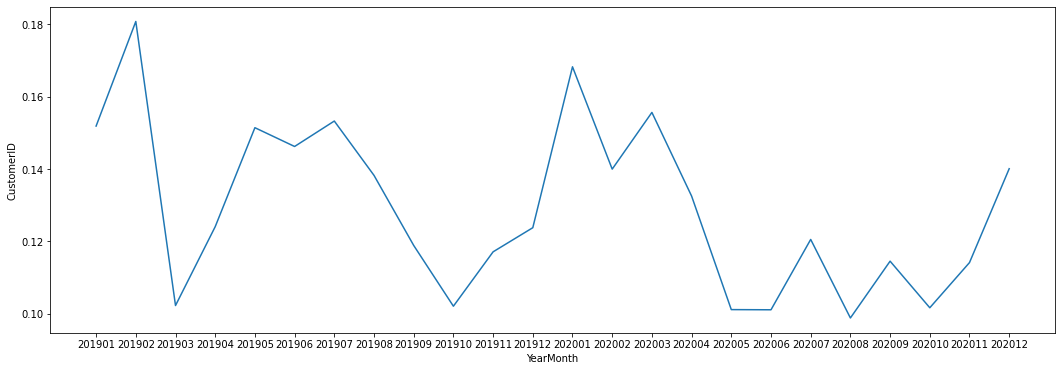

In [86]:
figure,axes = plt.subplots(figsize=(18,6))
sns.lineplot(x='YearMonth',y='CustomerID',data=tx_user_ratio,ax=axes)
plt.show()